# Group MAN-DTS GRP 
## Name and Matric Number
## Faith Bassey 

#### So after the extraction of the data from PDF and manipulation to add other countries, we move to Jupyter and Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# To display plots directly in the notebook
%matplotlib inline
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Loading Dataset and Checking the Structure of the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('customer_orders.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")

# Display the first few rows
print("First 5 rows:")
print(df.head())
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print("\n" + "="*50 + "\n")

# Check unique values in the 'Country' column to see inconsistencies
print("Unique values in 'Country' column:")
print(df['Country'].unique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          100 non-null    int64  
 1   Customer Name     100 non-null    object 
 2   Order Date        100 non-null    object 
 3   Product Category  100 non-null    object 
 4   Quantity          100 non-null    int64  
 5   Price             100 non-null    float64
 6   Total Amount      81 non-null     float64
 7   Country           100 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB
None


First 5 rows:
   Order ID Customer Name  Order Date Product Category  Quantity   Price  \
0         1    Customer 1  2022-06-01      Electronics         5  102.27   
1         2    Customer 2  2022-04-28          Fashion         3  195.72   
2         3    Customer 3  2022-04-08       Home Goods         5  176.54   
3         4    Customer 4 

### Handling Missing Values and Duplicated values by 

In [3]:
# Calculate missing Total Amount values using Price × Quantity
missing_mask = df['Total Amount'].isna()
df.loc[missing_mask, 'Total Amount'] = df.loc[missing_mask, 'Price'] * df.loc[missing_mask, 'Quantity']

print("✅ Calculated missing Total Amount values using Price × Quantity")
print(f"Filled {missing_mask.sum()} missing values")

✅ Calculated missing Total Amount values using Price × Quantity
Filled 19 missing values


In [4]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify duplicates are removed
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Number of duplicate rows after cleaning: 0
Shape of dataframe after removing duplicates: (100, 8)


### Standardiazation of the numerical columns as well as basic data exploration by 

In [5]:
numeric_cols = ['Order ID', 'Quantity', 'Price', 'Total Amount']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [6]:
print("\nBasic Statistics:")
print(f"Total orders: {len(df)}")
print(f"Date range: {df['Order Date'].min().date()} to {df['Order Date'].max().date()}")
print(f"Total revenue: ${df['Total Amount'].sum():,.2f}")
print(f"Average order value: ${df['Total Amount'].mean():,.2f}")


Basic Statistics:
Total orders: 100
Date range: 2022-01-01 to 2022-12-25
Total revenue: $31,137.16
Average order value: $311.37


### Standardardization of all countries in the dataset to the right name via mapping by 

In [7]:
#Map all variations to 'United States'
country_mapping = {
    'U.S.A.': 'United States',
    'usa': 'United States', 
    'Usa': 'United States',
    'NG' : 'Nigeria',
    'UK' : 'United Kingdom',
    'U.K': 'United Kingdom',
    'fr' : 'France'
}

# Apply mapping
df['Country'] = df['Country'].replace(country_mapping)

print("\n4. Standardized Country values:")
print(df['Country'].value_counts())


4. Standardized Country values:
Country
United States     47
United Kingdom    25
France            17
Nigeria           11
Name: count, dtype: int64


### Calculating Revenue by Category and Country done by 

In [8]:
category_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(category_revenue)


Revenue by Product Category:
Product Category
Fashion        11745.80
Electronics     9897.85
Home Goods      9493.51
Name: Total Amount, dtype: float64


In [9]:
country_revenue = df.groupby('Country')['Total Amount'].sum().sort_values(ascending=False)
print("\nRevenue by Country:")
print(country_revenue)


Revenue by Country:
Country
United States     16617.88
United Kingdom     7336.47
France             4764.63
Nigeria            2418.18
Name: Total Amount, dtype: float64


### Handling Visualisations 


CREATING VISUALIZATIONS


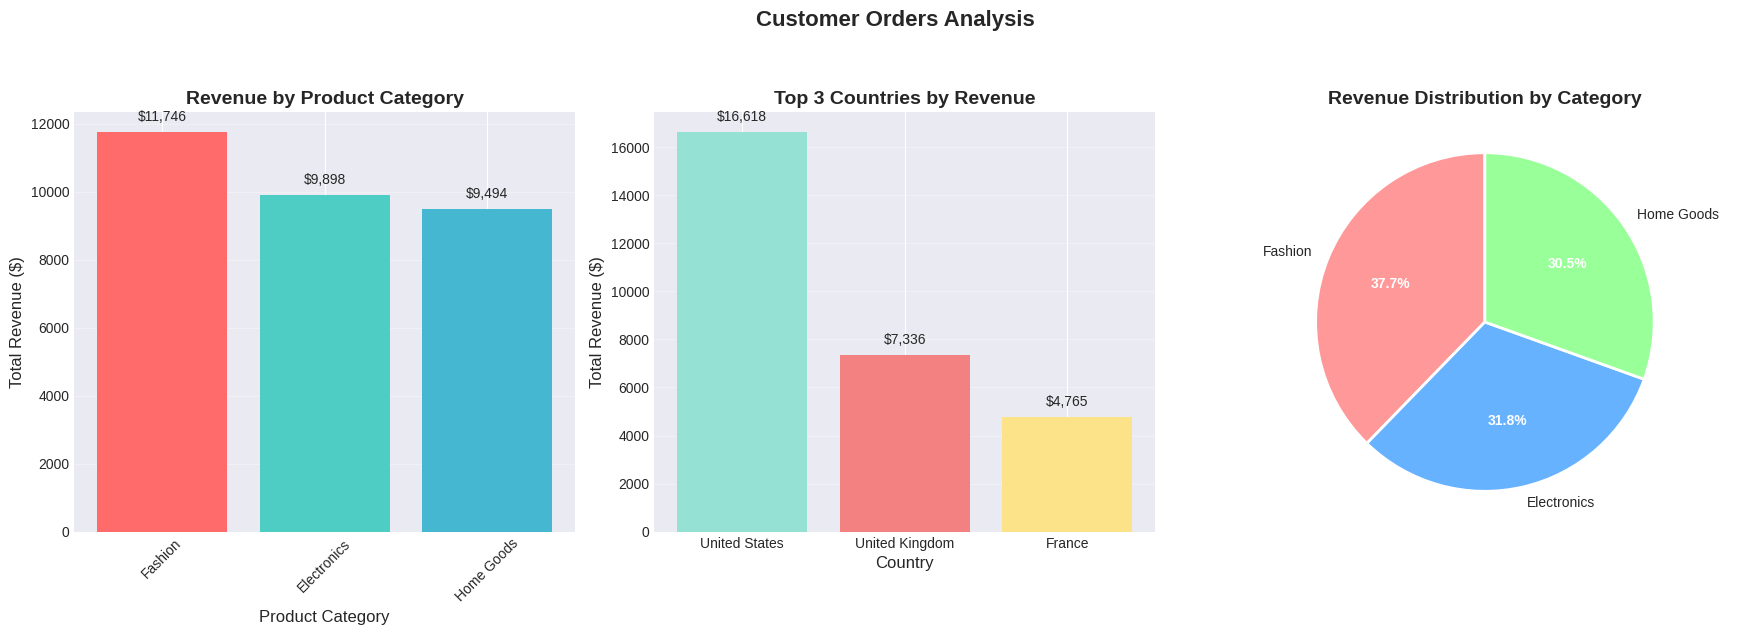

In [10]:

print("\n" + "="*50)
print("CREATING VISUALIZATIONS")
print("="*50)

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Customer Orders Analysis', fontsize=16, fontweight='bold', y=1.05)

# 4.1 Bar chart: Revenue by Product Category
ax1 = axes[0]
bars1 = ax1.bar(category_revenue.index, category_revenue.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_title('Revenue by Product Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Product Category', fontsize=12)
ax1.set_ylabel('Total Revenue ($)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(category_revenue.values)*0.02,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

# 4.2 Bar chart: Top 3 Countries by Revenue
top_3_countries = country_revenue.head(3)
ax2 = axes[1]
bars2 = ax2.bar(top_3_countries.index, top_3_countries.values, color=['#95E1D3', '#F38181', '#FCE38A'])
ax2.set_title('Top 3 Countries by Revenue', fontsize=14, fontweight='bold')
ax2.set_xlabel('Country', fontsize=12)
ax2.set_ylabel('Total Revenue ($)', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(top_3_countries.values)*0.02,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

# 4.3 Pie chart: Revenue Distribution by Category
ax3 = axes[2]
colors = ['#FF9999', '#66B2FF', '#99FF99']
wedges, texts, autotexts = ax3.pie(category_revenue.values, labels=category_revenue.index, 
                                    autopct='%1.1f%%', startangle=90, colors=colors,
                                    wedgeprops={'edgecolor': 'white', 'linewidth': 2})
ax3.set_title('Revenue Distribution by Category', fontsize=14, fontweight='bold')
ax3.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig('order_analysis_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

### The cleaned dataset experoted to csv

In [11]:
df.to_csv('customer_orders_cleaned.csv', index=False)
print("Cleaned dataset saved as 'customer_orders_cleaned.csv'")

Cleaned dataset saved as 'customer_orders_cleaned.csv'
